In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
dataset = pd.read_excel("Data-Pembelian.xlsx")
dataset

,ID,Umur,Jenis Kelamin,Pendapatan,Membeli
0,1,23,Pria,20 juta,Ya
1,2,32,Wanita,15 juta,Tidak
2,3,27,Pria,18 juta,Ya
3,4,41,Wanita,25 juta,Ya
4,5,29,Pria,17 juta,Tidak
5,6,35,Wanita,22 juta,Ya
6,7,26,Pria,19 juta,Tidak
7,8,38,Wanita,28 juta,Ya
8,9,27,Wanita,16 juta,Tidak
9,10,30,Pria,21 juta,Ya


In [3]:
dataset.drop("ID", axis=1, inplace=True)
dataset

,Umur,Jenis Kelamin,Pendapatan,Membeli
0,23,Pria,20 juta,Ya
1,32,Wanita,15 juta,Tidak
2,27,Pria,18 juta,Ya
3,41,Wanita,25 juta,Ya
4,29,Pria,17 juta,Tidak
5,35,Wanita,22 juta,Ya
6,26,Pria,19 juta,Tidak
7,38,Wanita,28 juta,Ya
8,27,Wanita,16 juta,Tidak
9,30,Pria,21 juta,Ya


In [4]:
le = LabelEncoder()
dataset["Jenis Kelamin"] = le.fit_transform(dataset["Jenis Kelamin"])
dataset["Pendapatan"] = le.fit_transform(dataset["Pendapatan"])
dataset["Membeli"] = le.fit_transform(dataset["Membeli"])
dataset

,Umur,Jenis Kelamin,Pendapatan,Membeli
0,23,0,5,1
1,32,1,0,0
2,27,0,3,1
3,41,1,8,1
4,29,0,2,0
5,35,1,7,1
6,26,0,4,0
7,38,1,9,1
8,27,1,1,0
9,30,0,6,1


In [5]:
x = dataset.iloc[:, [0,1]].values
x

array([[23,  0],
       [32,  1],
       [27,  0],
       [41,  1],
       [29,  0],
       [35,  1],
       [26,  0],
       [38,  1],
       [27,  1],
       [30,  0]], dtype=int64)

In [6]:
y = dataset.iloc[:, 3].values
y

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [8]:
x_train

array([[29,  0],
       [30,  0],
       [32,  1],
       [26,  0],
       [38,  1],
       [41,  1],
       [23,  0],
       [35,  1]], dtype=int64)

In [9]:
x_test

array([[27,  0],
       [27,  1]], dtype=int64)

In [10]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 1])

In [11]:
y_test

array([1, 0])

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[-0.48661135, -1.        ],
       [-0.30966177, -1.        ],
       [ 0.0442374 ,  1.        ],
       [-1.0174601 , -1.        ],
       [ 1.10593489,  1.        ],
       [ 1.63678363,  1.        ],
       [-1.54830884, -1.        ],
       [ 0.57508614,  1.        ]])

In [13]:
x_test = sc.transform(x_test)
x_test

array([[-0.84051051, -1.        ],
       [-0.84051051,  1.        ]])

In [14]:
klasifikasi = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
klasifikasi.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_prediction = klasifikasi.predict(x_test)
y_prediction

array([0, 0])

In [16]:
matrikskonfusion = confusion_matrix(y_test, y_prediction)
matrikskonfusion

array([[1, 0],
       [1, 0]], dtype=int64)

C:\Users\Haris\AppData\Local\Temp\ipykernel_9540\1210696086.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


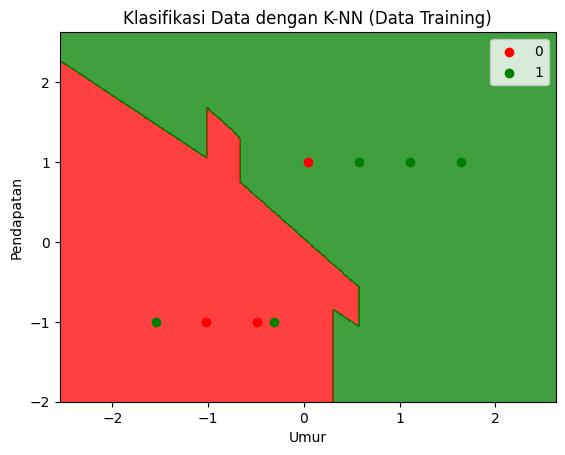

In [17]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, klasifikasi.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.legend()
plt.show()